In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
import math
import numpy as np

from coba.experiments  import Experiment, Result
from coba.environments import Environments
from coba.learners     import (RandomLearner,
                               EpsilonBanditLearner,
                               VowpalEpsilonLearner,
                               VowpalRegcbLearner,
                               VowpalSquarecbLearner,
                               LinUCBLearner)

from learners import (IGWBanditLearner,
                      SemiparametricIGWBanditLearner)

2022-02-09 16:04:29 -- Processing chunk...
2022-02-09 16:04:29 --   * Recording Learner 0 parameters... (0.0 seconds) (completed)
2022-02-09 16:04:29 --   * Recording Learner 1 parameters... (0.0 seconds) (completed)
2022-02-09 16:04:29 --   * Recording Learner 2 parameters... (0.0 seconds) (completed)
2022-02-09 16:04:29 --   * Recording Learner 3 parameters... (0.0 seconds) (completed)
2022-02-09 16:04:29 --   * Recording Learner 4 parameters... (0.0 seconds) (completed)
2022-02-09 16:04:29 --   * Recording Learner 5 parameters... (0.0 seconds) (completed)
2022-02-09 16:04:29 --   * Recording Learner 6 parameters... (0.0 seconds) (completed)
2022-02-09 16:04:29 --   * Recording Learner 7 parameters... (0.0 seconds) (completed)
2022-02-09 16:04:29 --   * Loading LinearSynth(A=2,c=10,a=0,X=['a', 'xa'],seed=1)... (0.1 seconds) (completed)
2022-02-09 16:04:29 --   * Creating Environment 0 from Loaded Source... (0.01 seconds) (completed)
2022-02-09 16:04:29 --   * Recording Environment 0 

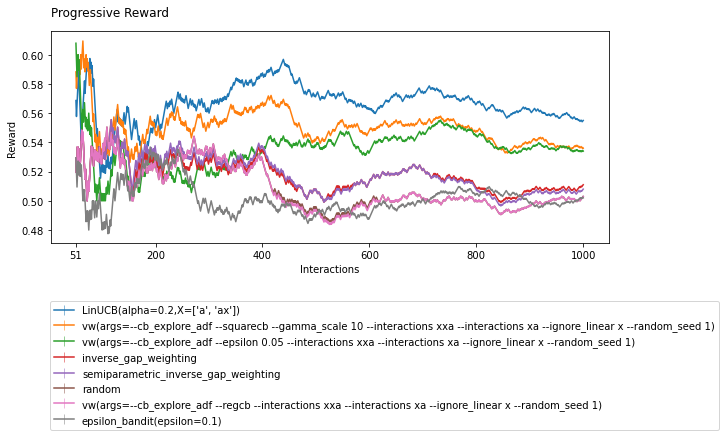

In [36]:
n_actions = 2
n_context_features = 10
n_interactions = 1000
r_noise_var = 1. / 100
environments = Environments.from_linear_synthetic(n_interactions=n_interactions,
                                                  n_actions=n_actions,
                                                  n_context_features=n_context_features,
                                                  r_noise_var=r_noise_var,
                                                  n_action_features=0).binary()

# environments = Environments.from_openml(149,take=1000)

epoch_schedule = 100
tuning_parameter = 1
learners     = [RandomLearner(),
                EpsilonBanditLearner(0.1),
                VowpalEpsilonLearner(),
                VowpalRegcbLearner(),
                VowpalSquarecbLearner(),
                IGWBanditLearner(epoch_schedule=epoch_schedule, tuning_parameter=tuning_parameter),
                SemiparametricIGWBanditLearner(epoch_schedule=epoch_schedule, tuning_parameter=tuning_parameter),
                LinUCBLearner()]

Experiment(environments, learners).evaluate().plot_learners(sort="reward")

2022-02-09 16:23:32 -- Processing chunk...
2022-02-09 16:23:32 --   * Recording Learner 0 parameters... (0.0 seconds) (completed)
2022-02-09 16:23:32 --   * Recording Learner 1 parameters... (0.0 seconds) (completed)
2022-02-09 16:23:32 --   * Recording Learner 2 parameters... (0.0 seconds) (completed)
2022-02-09 16:23:32 --   * Recording Learner 3 parameters... (0.0 seconds) (completed)
2022-02-09 16:23:32 --   * Recording Learner 4 parameters... (0.0 seconds) (completed)
2022-02-09 16:23:32 --   * Recording Learner 5 parameters... (0.0 seconds) (completed)
2022-02-09 16:23:32 --   * Recording Learner 6 parameters... (0.0 seconds) (completed)
2022-02-09 16:23:32 --   * Recording Learner 7 parameters... (0.0 seconds) (completed)
2022-02-09 16:23:33 --   * Loading LambdaSimulation... (0.87 seconds) (completed)
2022-02-09 16:23:33 --   * Creating Environment 0 from Loaded Source... (0.0 seconds) (completed)
2022-02-09 16:23:33 --   * Recording Environment 0 statistics... (0.0 seconds) (c

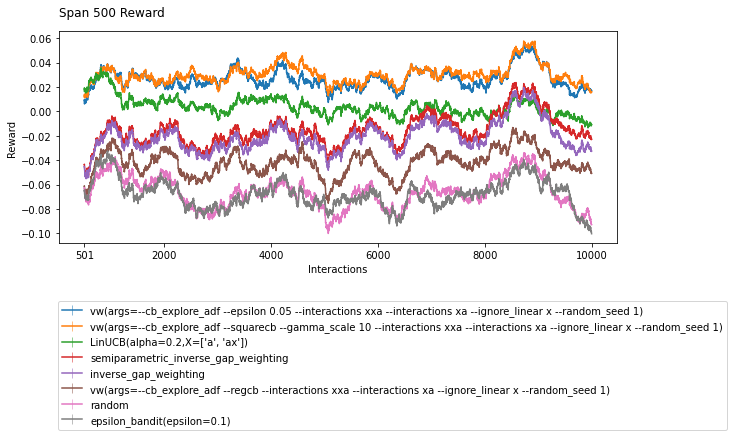

In [41]:
from typing import Sequence

from coba.random       import CobaRandom
from coba.environments import LambdaSimulation, Context, Action

np.random.seed(1)

n_actions = 2
n_context_features = 10
n_interactions = 10000
r_noise_var = 1. / 100

theta = np.random.normal(size=(n_actions, n_context_features))
theta = theta / np.linalg.norm(theta, axis=1, keepdims=True)

def context(index: int) -> Context:
    context = np.random.normal(size=n_context_features)
    context = context / np.linalg.norm(context)
#     context = np.abs(context)
#     if index < 1000:
#         context[0] = 1
# #     else:
# #         context[0] = 0
    return tuple(context)

def actions(index: int, context: Context) -> Sequence[Action]:
    return [tuple(1 if i == j else 0 for i in range(n_actions)) for j in range(n_actions)]

def rewards(index: int, context: Context, action: Action) -> float:
    v = np.dot(theta, np.array(context))
    h = 0. 
    
#     for c in context:
#         p = np.random.normal(size=3)
#         h += np.polyval(p, c)

#     for i in range(len(context)):
#         sigma = 2 * np.random.binomial(n=1, p=.5) - 1
# #         sigma = 1
#         if context[i] > .5:
#             h += sigma / len(context)
#         else:
#             h += -sigma / len(context)
        
#     if context[0] > 0:
#         if np.argmax(action) == 0:
#             h += 1
#         else:
#             h += -np.max(v)
#     else:
#         if np.argmax(action) == 1:
#             h += -np.max(v)
#         else:
#             h += 1
        
    if context[0] > .5:
        h += np.max(v)
    else:
        h += -np.max(v)
        
#     m = np.random.rand(n_context_features, n_context_features)
#     pairs = np.multiply(context, np.matmul(m, context))
#     for i in range(len(context)):
#         h += np.sin(context[i]) + np.sin(pairs[i])
# #         h += np.sin(context[i])
#     h = h / len(context)

#     h += -np.max(v)

    g = v[np.argmax(action)]    
    e = (np.random.uniform()-.5) * np.sqrt(12) * np.sqrt(r_noise_var)
    
    return h + g + e

environments = [LambdaSimulation(n_interactions, context, actions, rewards)]

epoch_schedule = 100
tuning_parameter = 1
do_feature_selection = False
learners     = [RandomLearner(),
                EpsilonBanditLearner(0.1),
                VowpalEpsilonLearner(),
                VowpalRegcbLearner(),
                VowpalSquarecbLearner(),
                IGWBanditLearner(epoch_schedule=epoch_schedule, tuning_parameter=tuning_parameter, do_feature_selection=do_feature_selection),
                SemiparametricIGWBanditLearner(epoch_schedule=epoch_schedule, tuning_parameter=tuning_parameter, do_feature_selection=do_feature_selection),
                LinUCBLearner()]

Experiment(environments, learners).evaluate().plot_learners(sort="reward", span=500)

In [ ]:
from typing import Sequence

from coba.random       import CobaRandom
from coba.environments import LambdaSimulation, Context, Action

np.random.seed(42)

n_actions = 2
n_context_features = 1000
n_interactions = 10000
r_noise_var = 1. / 100

theta = np.random.normal(size=(n_actions, n_context_features))
theta = theta / np.linalg.norm(theta, axis=1, keepdims=True)

def context(index: int) -> Context:
    context = np.random.normal(size=n_context_features)
    context = context / np.linalg.norm(context)
#     context = np.abs(context)
#     if index < 1000:
#         context[0] = 1
# #     else:
# #         context[0] = 0
    return tuple(context)

def actions(index: int, context: Context) -> Sequence[Action]:
    return [tuple(1 if i == j else 0 for i in range(n_actions)) for j in range(n_actions)]

def rewards(index: int, context: Context, action: Action) -> float:
    v = np.dot(theta, np.array(context))
    h = 0. 
    
#     for c in context:
#         p = np.random.normal(size=3)
#         h += np.polyval(p, c)

#     for i in range(len(context)):
#         sigma = 2 * np.random.binomial(n=1, p=.5) - 1
# #         sigma = 1
#         if context[i] > .5:
#             h += sigma / len(context)
#         else:
#             h += -sigma / len(context)
        
#     if context[0] > 0:
#         if np.argmax(action) == 0:
#             h += 1
#         else:
#             h += -np.max(v)
#     else:
#         if np.argmax(action) == 1:
#             h += -np.max(v)
#         else:
#             h += 1
        
    if context[0] > .5:
        h += 0
    else:
        h += -np.max(v)
        
#     m = np.random.rand(n_context_features, n_context_features)
#     pairs = np.multiply(context, np.matmul(m, context))
#     for i in range(len(context)):
#         h += np.sin(context[i]) + np.sin(pairs[i])
# #         h += np.sin(context[i])
#     h = h / len(context)

#     h += -np.max(v)

#     g = v[np.argmax(action)]   
    if np.argmax(action) == 0:
        g = 1
    else:
        g = 0
    e = (np.random.uniform()-.5) * np.sqrt(12) * np.sqrt(r_noise_var)
    
    return h + g + e

environments = [LambdaSimulation(n_interactions, context, actions, rewards)]

epoch_schedule = 0
tuning_parameter = 1
do_feature_selection = True
learners     = [RandomLearner(),
                IGWBanditLearner(epoch_schedule=epoch_schedule, tuning_parameter=tuning_parameter, do_feature_selection=do_feature_selection),
                SemiparametricIGWBanditLearner(epoch_schedule=epoch_schedule, tuning_parameter=tuning_parameter, do_feature_selection=do_feature_selection),]

Experiment(environments, learners).evaluate().plot_learners(sort="reward", span=100)

2022-02-09 16:43:57 -- Processing chunk...
2022-02-09 16:43:57 --   * Recording Learner 0 parameters... (0.0 seconds) (completed)
2022-02-09 16:43:57 --   * Recording Learner 1 parameters... (0.0 seconds) (completed)
2022-02-09 16:43:57 --   * Recording Learner 2 parameters... (0.0 seconds) (completed)
2022-02-09 16:44:00 --   * Loading LambdaSimulation... (3.01 seconds) (completed)
2022-02-09 16:44:00 --   * Creating Environment 0 from Loaded Source... (0.0 seconds) (completed)
2022-02-09 16:44:00 --   * Recording Environment 0 statistics... (0.0 seconds) (completed)
2022-02-09 16:44:00 --   * Evaluating Learner 0 on Environment 0... (0.17 seconds) (completed)
2022-02-09 16:51:12 --   * Evaluating Learner 1 on Environment 0... (432.17 seconds) (completed)
